In [1]:
import sys
from pathlib import Path

# Add project root to path for bioneuralnet imports
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Add PD-Notebooks to path for local processing imports
pd_notebooks = Path().resolve()
if str(pd_notebooks) not in sys.path:
    sys.path.insert(0, str(pd_notebooks))

print(f"Project root added to path: {project_root}")
print(f"PD-Notebooks added to path: {pd_notebooks}")


Project root added to path: C:\Users\Elyas\OneDrive - The University of Colorado Denver\Desktop\li 9ra 9ra bekri\Fall Semester 2025\GNN\BioNeuralNet
PD-Notebooks added to path: C:\Users\Elyas\OneDrive - The University of Colorado Denver\Desktop\li 9ra 9ra bekri\Fall Semester 2025\GNN\BioNeuralNet\PD-Notebooks


In [2]:
from bioneuralnet.datasets import load_parkinsons_data
# Load PD transcriptomics data (GSE165082)
expression_df, sample_meta, gene_meta = load_parkinsons_data()

print(f"Expression matrix shape: {expression_df.shape} (genes × samples)")
print(f"\nSample condition distribution:")
print(sample_meta['condition'].value_counts())
print(f"\nGene metadata shape: {gene_meta.shape}")
print(f"\nFirst few genes with annotations:")
gene_meta.head()


2025-11-29 14:56:02,358 - bioneuralnet.datasets.parkinsons_loader - INFO - Initialized ParkinsonsLoader with counts='C:\Users\Elyas\OneDrive - The University of Colorado Denver\Desktop\li 9ra 9ra bekri\Fall Semester 2025\GNN\BioNeuralNet\PD-Notebooks\datasets\GSE165082_PD-CC.counts.txt', annotation='C:\Users\Elyas\OneDrive - The University of Colorado Denver\Desktop\li 9ra 9ra bekri\Fall Semester 2025\GNN\BioNeuralNet\PD-Notebooks\datasets\Human.GRCh38.p13.annot.tsv'
2025-11-29 14:56:02,359 - bioneuralnet.datasets.parkinsons_loader - INFO - Loading PD counts matrix from 'C:\Users\Elyas\OneDrive - The University of Colorado Denver\Desktop\li 9ra 9ra bekri\Fall Semester 2025\GNN\BioNeuralNet\PD-Notebooks\datasets\GSE165082_PD-CC.counts.txt'.
2025-11-29 14:56:02,466 - bioneuralnet.datasets.parkinsons_loader - INFO - Loaded counts matrix with shape (63677, 26) (genes × samples).
2025-11-29 14:56:02,469 - bioneuralnet.datasets.parkinsons_loader - INFO - Sample metadata constructed. Conditio

Expression matrix shape: (63677, 26) (genes × samples)

Sample condition distribution:
condition
CC    14
PD    12
Name: count, dtype: int64

Gene metadata shape: (63677, 17)

First few genes with annotations:


,GeneID,Symbol,Description,Synonyms,GeneType,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
EnsemblGeneID,,,,,,,,,,,,,,,,,
ENSG00000223972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000227232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000243485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000237613,645520.0,FAM138A,family with sequence similarity 138 member A,F379|FAM138F,ncRNA,active,NC_000001.11,34611,36081,negative,1130.0,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000268020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Step 2: Preprocessing for GNN
from processing.parkinsons_processing import preprocess_pipeline

# Run complete preprocessing pipeline
processed_expr, node_features = preprocess_pipeline(
    expression_df,
    log_transform=True,
    log_method="log2",
    select_hvgs=True,
    n_hvgs=5000,  # Select top 5000 highly variable genes
    normalize=True,
    normalize_method="standard",
    build_features=True,
    feature_type="mean_variance",  # Options: "mean_variance", "pca", "combined", "full"
)

print(f"\nPreprocessed expression shape: {processed_expr.shape}")
print(f"Node features shape: {node_features.shape}")
print(f"\nNode feature columns: {list(node_features.columns)}")
print(f"\nFirst few node features:")
node_features.head()


2025-11-29 14:56:02,903 - processing.parkinsons_processing - INFO - ============================================================
2025-11-29 14:56:02,904 - processing.parkinsons_processing - INFO - Starting complete preprocessing pipeline for PD GNN analysis.
2025-11-29 14:56:02,905 - processing.parkinsons_processing - INFO - ============================================================
2025-11-29 14:56:02,906 - processing.parkinsons_processing - INFO - Starting GNN preprocessing pipeline.
2025-11-29 14:56:02,910 - processing.parkinsons_processing - INFO - Applying log2 transformation with pseudocount=1.0 to expression matrix of shape (63677, 26).
2025-11-29 14:56:02,933 - processing.parkinsons_processing - INFO - Log transformation complete. Shape: (63677, 26)
2025-11-29 14:56:02,935 - processing.parkinsons_processing - INFO - Step 1/3: Log transformation complete.
2025-11-29 14:56:02,936 - processing.parkinsons_processing - INFO - Selecting 5000 highly variable genes from 63677 genes u


Preprocessed expression shape: (5000, 26)
Node features shape: (5000, 2)

Node feature columns: ['mean', 'variance']

First few node features:


,mean,variance
Geneid,,
ENSG00000129824,0.503357,-2.220446e-16
ENSG00000012817,-0.078246,0.000000e+00
ENSG00000099725,-0.168717,0.000000e+00
ENSG00000229807,-0.039472,0.000000e+00
ENSG00000067048,-0.317349,-2.220446e-16


In [4]:
# Step 3: Build gene-gene correlation graph
from graph_builder import build_pd_graph

# IMPORTANT: Make sure processed_expr has been filtered to fewer genes (e.g., 5000 HVGs)
# If you see a memory error, check that processed_expr.shape[0] is reasonable (< 10000)
print(f"Expression shape before graph construction: {processed_expr.shape}")
if processed_expr.shape[0] > 10000:
    print("WARNING: Too many genes! Consider using fewer HVGs in preprocessing.")

# Build graph from preprocessed expression and node features
graph_data = build_pd_graph(
    processed_expr,
    node_features,
    method="pearson",
    threshold=0.7,  # Minimum correlation to create an edge
    use_abs=True,
    mutual=True,
    self_loops=False,
    use_bioneuralnet=False,  # Use threshold-based (simpler) or set True for kNN-based
    chunk_size=None,  # Auto-detects chunk size for large datasets
)

print(f"\nGraph summary:")
print(f"  Nodes (genes): {graph_data.data.num_nodes}")
print(f"  Edges: {graph_data.data.num_edges}")
print(f"  Node features: {graph_data.data.num_node_features}")
print(f"  Edge density: {graph_data.data.num_edges / (graph_data.data.num_nodes * (graph_data.data.num_nodes - 1)) * 2:.4f}")

# Optional: Save graph to disk
# from graph_builder import save_graph
# save_graph(graph_data, "data/processed/pd_graph")


2025-11-29 14:56:21,622 - graph_builder - INFO - ============================================================
2025-11-29 14:56:21,622 - graph_builder - INFO - Building PD gene-gene correlation graph.
2025-11-29 14:56:21,623 - graph_builder - INFO - ============================================================
2025-11-29 14:56:21,624 - graph_builder - INFO - Using threshold-based correlation graph.
2025-11-29 14:56:21,625 - graph_builder - INFO - Building correlation graph from expression matrix of shape (5000, 26) using method='pearson', threshold=0.7.
2025-11-29 14:56:21,626 - graph_builder - INFO - Using full matrix correlation computation.


Expression shape before graph construction: (5000, 26)


2025-11-29 14:56:23,601 - graph_builder - INFO - Graph constructed: 5000 nodes, 556128 edges (threshold=0.7).
2025-11-29 14:56:23,613 - graph_builder - INFO - Converting adjacency matrix ((5000, 5000)) and node features ((5000, 2)) to PyTorch Geometric format.
2025-11-29 14:56:28,187 - graph_builder - INFO - PyG Data object created: 5000 nodes, 1112256 edges, 2 features per node.
2025-11-29 14:56:28,200 - graph_builder - INFO - ============================================================
2025-11-29 14:56:28,201 - graph_builder - INFO - Graph construction complete!
2025-11-29 14:56:28,201 - graph_builder - INFO - Nodes: 5000, Edges: 1112256
2025-11-29 14:56:28,202 - graph_builder - INFO - ============================================================



Graph summary:
  Nodes (genes): 5000
  Edges: 1112256
  Node features: 2
  Edge density: 0.0890


2025-11-29 14:56:28,214 - graph_builder - INFO - Visualizing graph with 5000 nodes...
2025-11-29 14:56:28,249 - graph_builder - INFO - Graph has 5000 nodes. Sampling 20 nodes for visualization.
2025-11-29 14:56:28,302 - graph_builder - INFO - Visualizing subgraph with 20 nodes.


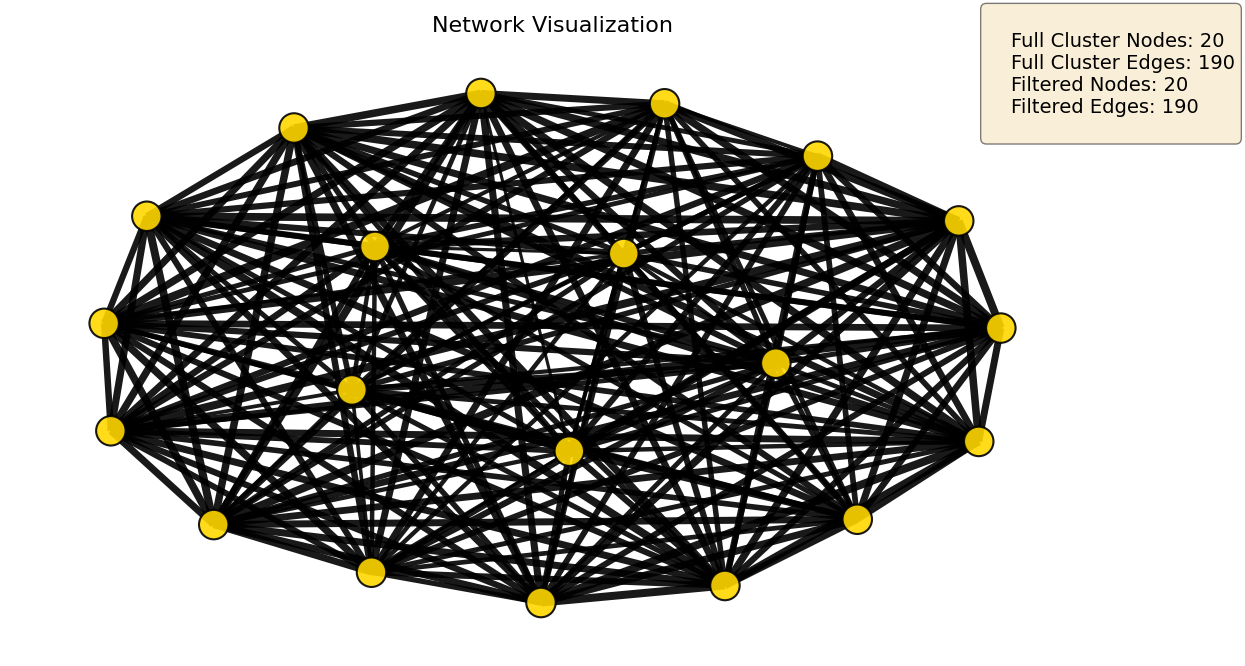

2025-11-29 14:56:28,465 - graph_builder - INFO - Graph visualization complete.


<Figure size 640x480 with 0 Axes>


Node mapping (first 10):
                  Omic  Degree
Index                         
1      ENSG00000108848      19
2      ENSG00000116754      19
3      ENSG00000153914      19
4      ENSG00000147874      19
5      ENSG00000132424      19
6      ENSG00000154265      19
7      ENSG00000013441      19
8      ENSG00000122482      19
9      ENSG00000095564      19
10     ENSG00000115524      19


In [5]:
# Step 3b: Visualize the graph
from graph_builder import visualize_graph
import matplotlib.pyplot as plt

# Visualize the graph (sample subgraph if too large)
node_mapping = visualize_graph(
    graph_data,
    weight_threshold=0.7,  # Only show edges above threshold
    show_labels=False,  # Set True to show gene IDs (can be cluttered)
    show_edge_weights=False,  # Set True to show correlation values
    layout="kamada",  # Options: "kamada", "spring", "spectral"
    max_nodes=20,  # Sample top 500 nodes by degree for visualization
    figsize=(14, 8),
)

plt.tight_layout()
plt.show()

print(f"\nNode mapping (first 10):")
print(node_mapping.head(10))


In [6]:
# Step 4: Train baseline (non-graph) model for comparison
from models.baseline import train_baseline
import numpy as np

# Train logistic regression baseline
baseline_model, baseline_results = train_baseline(
    processed_expr,  # Use preprocessed expression
    sample_meta,
    model_type="logistic",  # Options: "logistic" or "mlp"
    condition_col="condition",
    random_state=42,
    test_size=0.2,
)

# Print results
print("\n" + "="*60)
print("BASELINE MODEL RESULTS")
print("="*60)
print(f"Accuracy: {baseline_results.accuracy:.4f}")
print(f"F1-score (macro): {baseline_results.f1_score:.4f}")
print(f"F1-score (weighted): {baseline_results.f1_weighted:.4f}")
print(f"\nConfusion Matrix:")
print(baseline_results.confusion_matrix)
print(f"\nClassification Report:")
print(baseline_results.classification_report)


2025-11-29 14:56:28,508 - models.baseline.baseline_model - INFO - Initialized logistic baseline model with random_state=42.
2025-11-29 14:56:28,509 - models.baseline.baseline_model - INFO - ============================================================
2025-11-29 14:56:28,510 - models.baseline.baseline_model - INFO - Training baseline model.
2025-11-29 14:56:28,511 - models.baseline.baseline_model - INFO - ============================================================
2025-11-29 14:56:28,514 - models.baseline.baseline_model - INFO - Training data: 26 samples, 5000 features
2025-11-29 14:56:28,515 - models.baseline.baseline_model - INFO - Class distribution: {0: 14, 1: 12}


2025-11-29 14:56:28,610 - models.baseline.baseline_model - INFO - Training logistic model...
2025-11-29 14:56:28,637 - models.baseline.baseline_model - INFO - Test accuracy: 0.6667
2025-11-29 14:56:28,639 - models.baseline.baseline_model - INFO - Test F1-score (macro): 0.6667
2025-11-29 14:56:28,640 - models.baseline.baseline_model - INFO - Test F1-score (weighted): 0.6667
2025-11-29 14:56:28,641 - models.baseline.baseline_model - INFO - ============================================================
2025-11-29 14:56:28,642 - models.baseline.baseline_model - INFO - Baseline model training complete!
2025-11-29 14:56:28,642 - models.baseline.baseline_model - INFO - ============================================================



BASELINE MODEL RESULTS
Accuracy: 0.6667
F1-score (macro): 0.6667
F1-score (weighted): 0.6667

Confusion Matrix:
[[2 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

     Control       0.67      0.67      0.67         3
          PD       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



2025-11-29 14:56:46,555 - models.gnn.gnn_trainer - INFO - Initialized GNNTrainer: model=GCN, hidden_dim=64, layers=2, device=cpu
2025-11-29 14:56:46,557 - models.gnn.gnn_trainer - INFO - ============================================================
2025-11-29 14:56:46,557 - models.gnn.gnn_trainer - INFO - Training GNN model.
2025-11-29 14:56:46,558 - models.gnn.gnn_trainer - INFO - ============================================================
2025-11-29 14:56:46,686 - models.gnn.gnn_trainer - INFO - Using unsupervised embedding learning.
2025-11-29 14:57:08,166 - models.gnn.gnn_trainer - INFO - Epoch 20/100, Loss: 0.0000
2025-11-29 14:57:28,619 - models.gnn.gnn_trainer - INFO - Epoch 40/100, Loss: 0.0000
2025-11-29 14:57:48,198 - models.gnn.gnn_trainer - INFO - Epoch 60/100, Loss: 0.0000
2025-11-29 14:58:07,033 - models.gnn.gnn_trainer - INFO - Epoch 80/100, Loss: 0.0000
2025-11-29 14:58:30,203 - models.gnn.gnn_trainer - INFO - Epoch 100/100, Loss: 0.0000
2025-11-29 14:58:30,205 - models


GNN TRAINING RESULTS
Embeddings shape: (5000, 64)
Final training loss: 0.0000


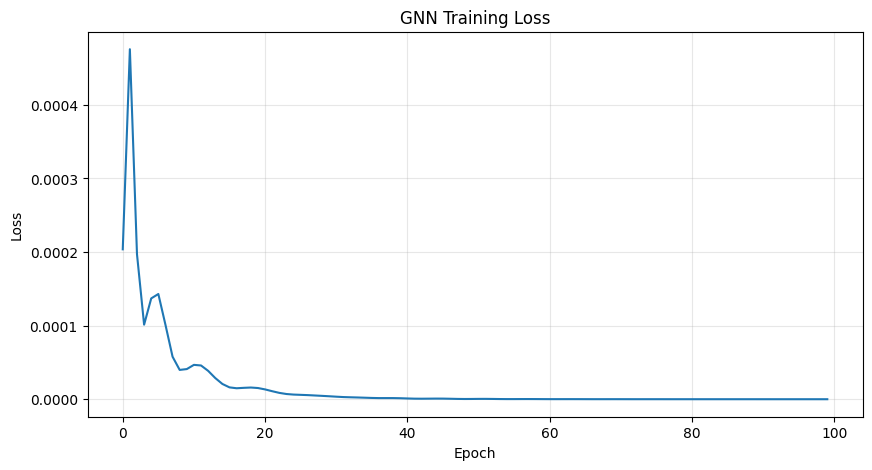

In [8]:
# Step 5: Train GNN model and generate embeddings
from models.gnn import train_gnn_pd
import matplotlib.pyplot as plt
import torch

# Train GNN on the gene-gene correlation graph
gnn_trainer, gnn_results = train_gnn_pd(
    graph_data.data,  # PyG Data object
    model_type="GCN",  # Options: "GCN", "GAT", "SAGE", "GIN"
    hidden_dim=64,
    layer_num=2,
    num_epochs=100,
    device="cpu",
    supervision_targets=None,  # Unsupervised embedding learning
    lr=0.01,
    weight_decay=5e-4,
    dropout=0.5,
    seed=42,
)

# Print results
print("\n" + "="*60)
print("GNN TRAINING RESULTS")
print("="*60)
print(f"Embeddings shape: {gnn_results.embeddings.shape}")
print(f"Final training loss: {gnn_results.training_losses[-1]:.4f}")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(gnn_results.training_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("GNN Training Loss")
plt.grid(True, alpha=0.3)
plt.show()


2025-11-29 14:59:14,876 - analysis.embedding_analysis - INFO - ============================================================
2025-11-29 14:59:14,877 - analysis.embedding_analysis - INFO - Starting embedding analysis pipeline.
2025-11-29 14:59:14,878 - analysis.embedding_analysis - INFO - ============================================================
2025-11-29 14:59:14,878 - analysis.embedding_analysis - INFO - Reducing embeddings from 64D to 2D using method='umap'.
2025-11-29 14:59:14,879 - analysis.embedding_analysis - WARNING - UMAP not available. Install with: pip install umap-learn. Falling back to t-SNE.
2025-11-29 14:59:26,736 - analysis.embedding_analysis - INFO - t-SNE reduction complete.
2025-11-29 14:59:26,738 - analysis.embedding_analysis - INFO - Clustering 5000 nodes using method='kmeans'.
2025-11-29 14:59:27,514 - analysis.embedding_analysis - INFO - Auto-selected n_clusters=2 using elbow method.
2025-11-29 14:59:27,834 - analysis.embedding_analysis - INFO - KMeans clusteri


CLUSTER ANALYSIS SUMMARY
Number of clusters: 2
Silhouette score: 0.4678

Cluster sizes:
  Cluster 0: 4161 genes
  Cluster 1: 839 genes

Cluster summary DataFrame:


,cluster_id,size,genes
0,0,4161,"[ENSG00000129824, ENSG00000012817, ENSG0000009..."
1,1,839,"[ENSG00000247627, ENSG00000184674, ENSG0000022..."


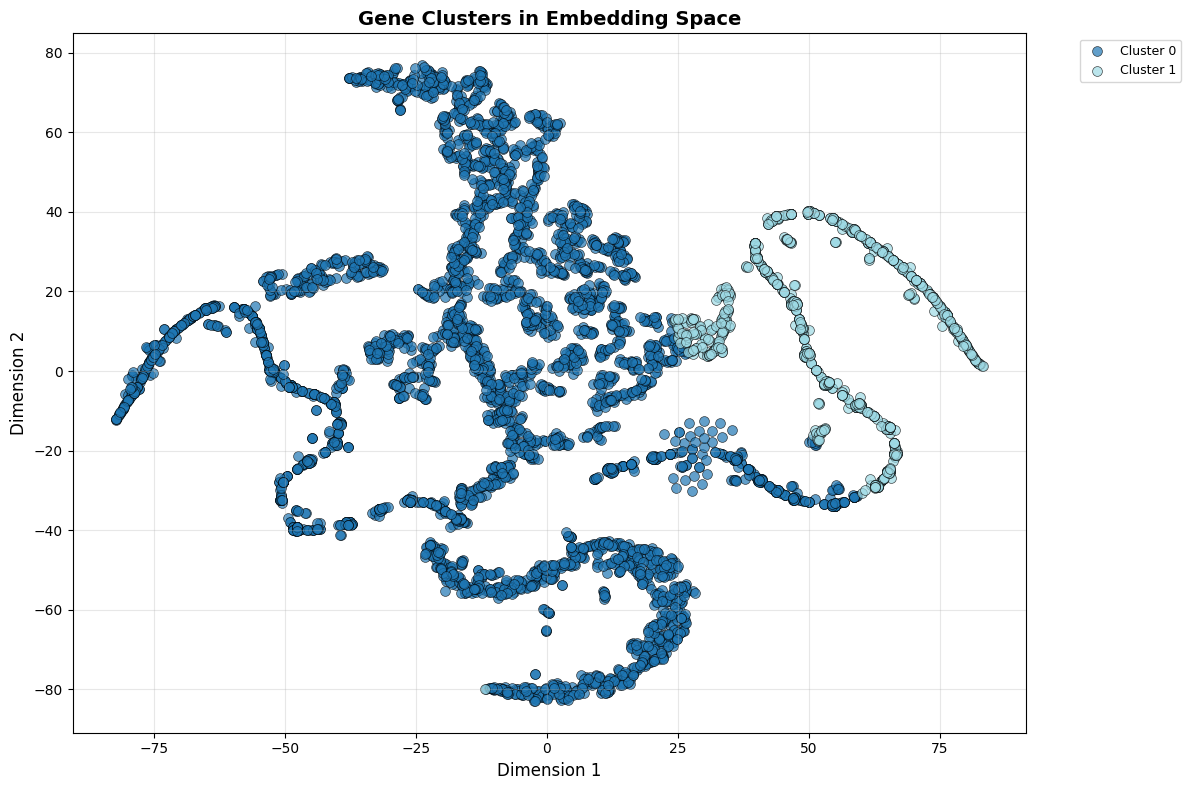

In [10]:
# Step 7: Graph Mining & Embedding Analysis
from analysis.embedding_analysis import embedding_analysis_pipeline
import numpy as np

# Run complete embedding analysis pipeline
reduced_emb, cluster_results, cluster_df, summary_df = embedding_analysis_pipeline(
    gnn_results.embeddings,  # GNN embeddings
    graph_data.node_names,  # Gene IDs
    adjacency_matrix=graph_data.adjacency_matrix,  # For Leiden clustering
    gene_metadata=gene_meta,  # Gene annotations
    reduction_method="umap",  # Options: "umap" or "tsne"
    clustering_method="kmeans",  # Options: "kmeans" or "leiden"
    n_clusters=None,  # Auto-detect for KMeans
    random_state=42,
)

# Print cluster summary
print("\n" + "="*60)
print("CLUSTER ANALYSIS SUMMARY")
print("="*60)
print(f"Number of clusters: {cluster_results.n_clusters}")
if cluster_results.silhouette_score is not None:
    print(f"Silhouette score: {cluster_results.silhouette_score:.4f}")
print(f"\nCluster sizes:")
for cluster_id, size in sorted(cluster_results.cluster_sizes.items()):
    print(f"  Cluster {cluster_id}: {size} genes")

print(f"\nCluster summary DataFrame:")
summary_df.head(10)
